# The Sparks Foundation

## Author: Sumit Kutty

### Task: Prediction using Unsupervised ML

In [125]:
# Loading the necessary packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings as w
w('ignore')
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.cluster import KMeans
sns.set(style='darkgrid', context='talk',      
        palette=['#62C370', '#FFD166', '#EF476F'])

In [126]:
dataset = pd.read_csv('iris.csv')
data = dataset.copy()
data.drop("Id", axis = 1, inplace =True)

In [127]:
#Checking for null values
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

* No null values

In [128]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Box plot of all features against the labels

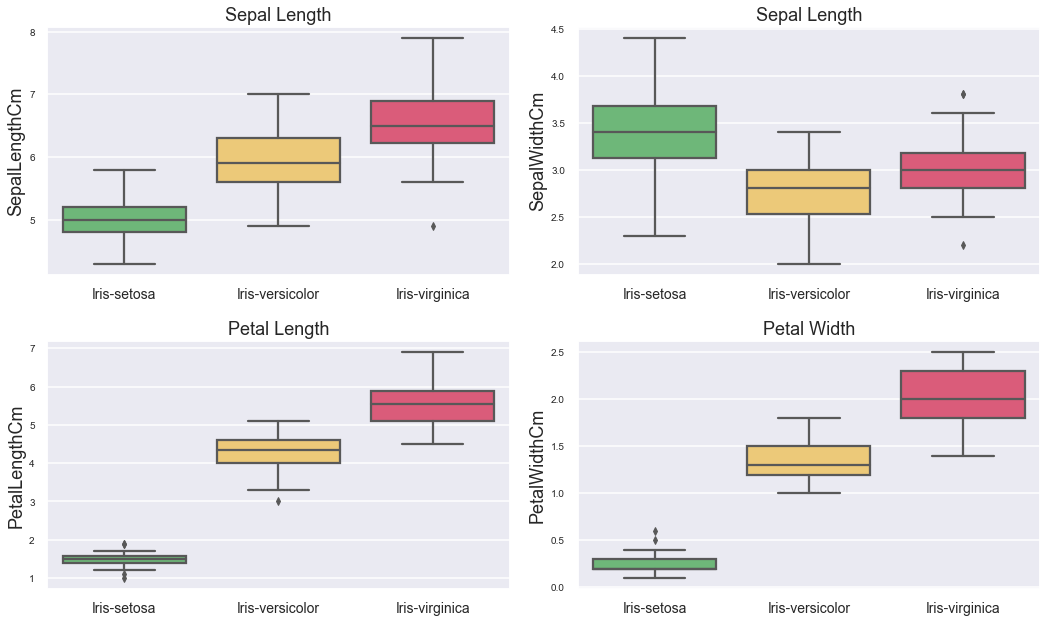

In [129]:
fig = plt.figure(figsize = (15,9))
ax1 = fig.add_subplot(221)
sns.boxplot( x = 'Species', y= 'SepalLengthCm',  data=data)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10)
plt.xlabel("")
ax1.set_title('Sepal Length', fontsize = 18)

ax2 = fig.add_subplot(222)
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data=data)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10)
plt.xlabel("")
ax2.set_title('Sepal Length', fontsize = 18)

fig.tight_layout()
ax3 = fig.add_subplot(223)
sns.boxplot( x = 'Species', y= 'PetalLengthCm',  data=data)
plt.xticks(fontsize =14)
plt.yticks(fontsize = 10)
plt.xlabel("")
ax3.set_title('Petal Length', fontsize = 18)

fig.tight_layout()
ax4 = fig.add_subplot(224)
sns.boxplot( x = 'Species', y= 'PetalWidthCm',  data=data)
plt.xticks(fontsize =14)
plt.yticks(fontsize = 10)
plt.xlabel("")
ax4.set_title('Petal Width', fontsize = 18)

fig.tight_layout(rect=[0.1, 1.2, 1.8, 0.12])
plt.show()

### Scatter plots of Features against the labels (Original Clusters)

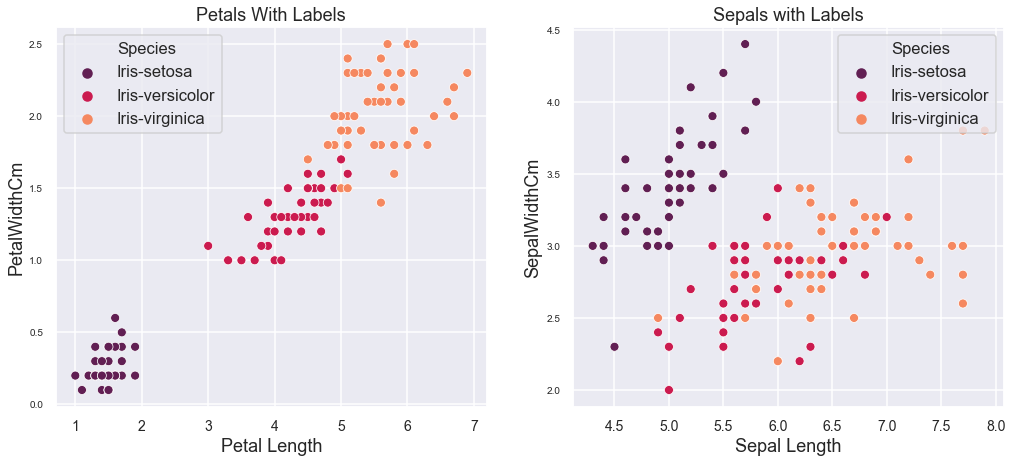

In [130]:
fig = plt.figure(figsize = (17,7))
ax1 = fig.add_subplot(121)
sns.scatterplot( x = 'PetalLengthCm', y= 'PetalWidthCm',hue = 'Species',  data=data, palette = 'rocket')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10)
plt.xlabel("Petal Length")
ax1.set_title('Petals With Labels', fontsize = 18)

ax2 = fig.add_subplot(122)
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm',hue = 'Species', data=data, palette = 'rocket')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10)
plt.xlabel("Sepal Length")
ax2.set_title('Sepals with Labels', fontsize = 18)


fig.tight_layout(rect=[0.1, 1.2, 1.8, 0.12])
plt.show()

### Pair Plot between the features

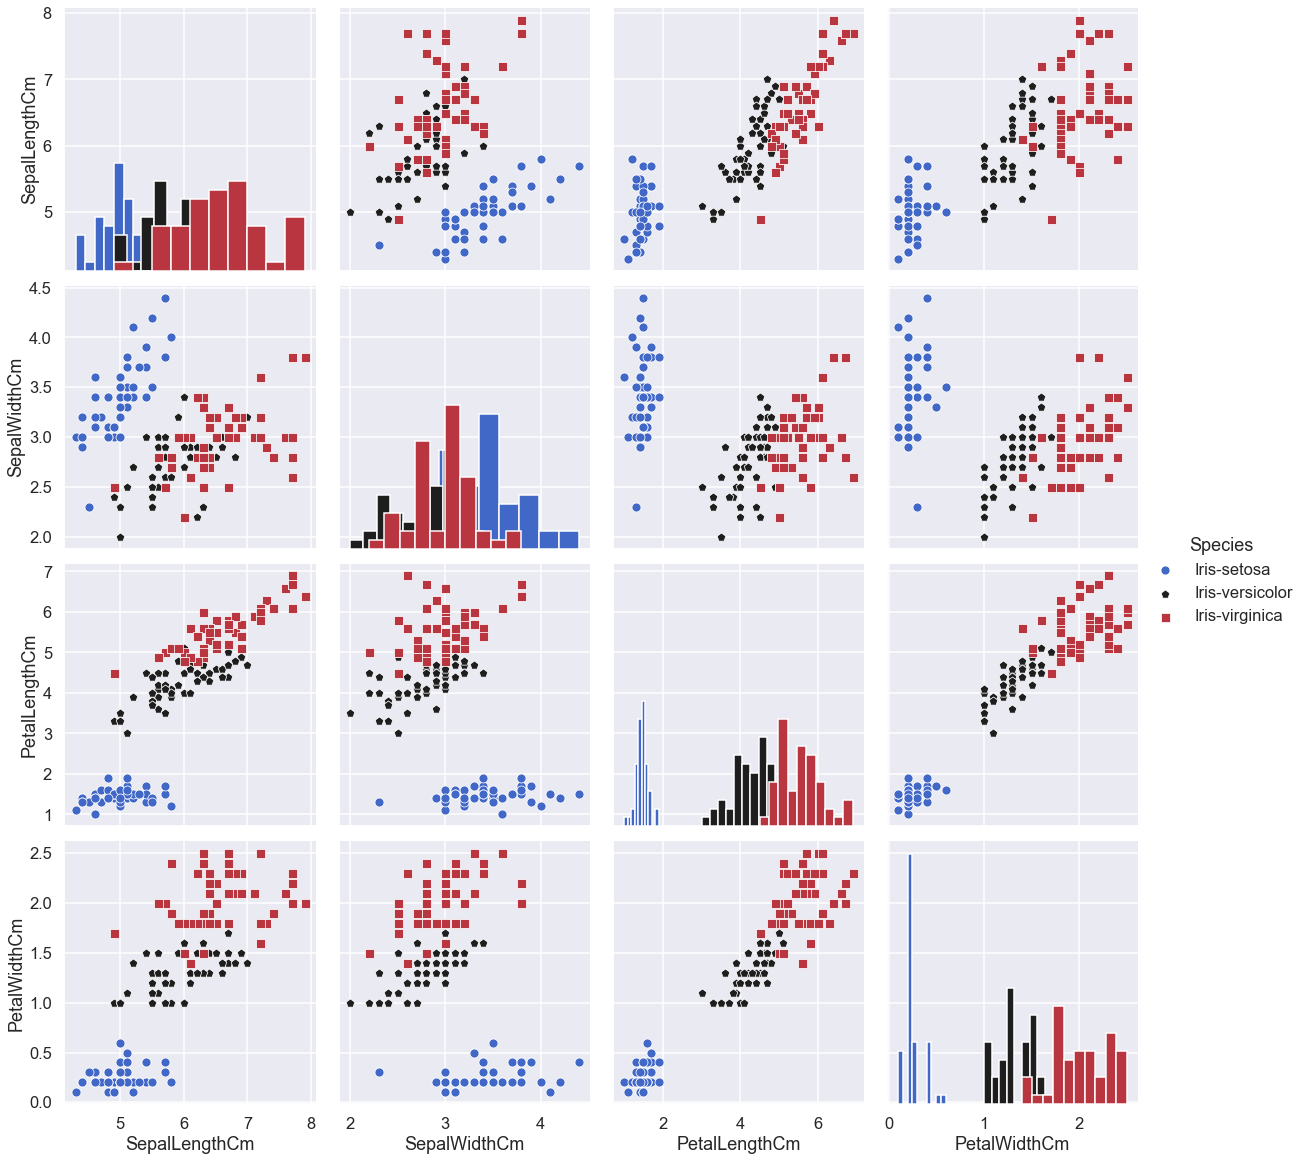

In [131]:
sns.pairplot(data, hue = 'Species', diag_kind = 'hist', palette = 'icefire', markers = ['o','p','s'], size = 4)

plt.show()

* The diagonal is the histogram of the particular feature with respect to the Class

### Class Observations

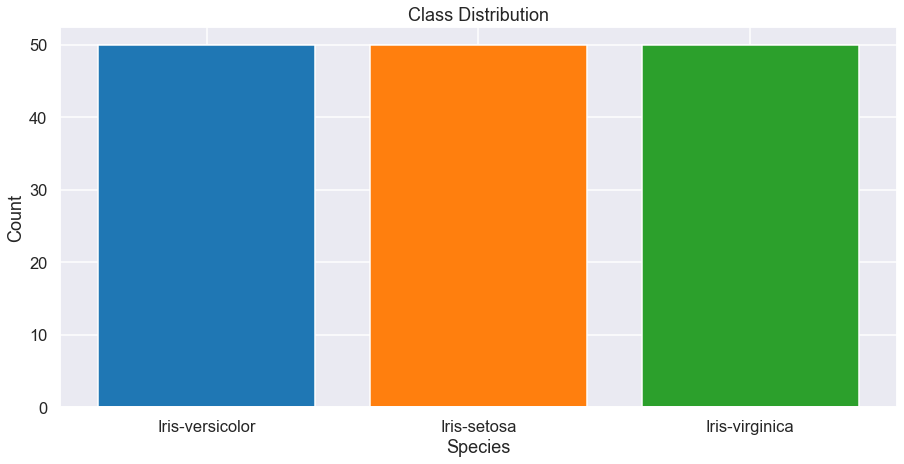

In [132]:
plt.figure(figsize = (15,7))
plt.bar(x = data['Species'].value_counts().index, height = data['Species'].value_counts(), color = sns.color_palette('tab10'))
plt.xlabel("Species")
plt.ylabel("Count")
plt.title("Class Distribution")

plt.show()

### Pearson Correlation between the features

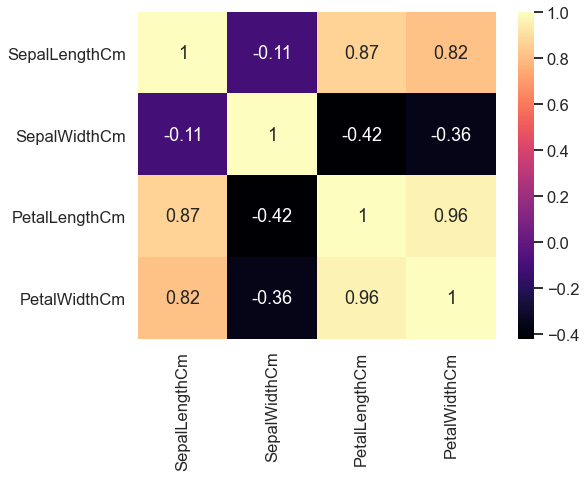

In [133]:
plt.figure(figsize = (8,6))
sns.heatmap(data.corr(), annot = True, cmap  = 'magma')
plt.show()

* Sepal Width has high negative correlation with Petal Width and Petal Length
* Sepal Length has high positive correlation with Petal Length and Petal Width

In [134]:
x = data.drop('Species', axis=1)
y = data['Species']

### Clustering using KMeans Algorithm

* The number of clusters to create wouldn't be known in an unsupervised problem. Hence we would need a way to find the optimum no of clusters.
* Elbow method is one such way which helps us do just that.
* Elbow method is used to find the elbow point in the graph where the wcss is plotted against different k values.
* WCSS(within cluster sum of squares) is the avg distance between the datapoints and their respective centroids.
* Hence, lower the wcss, closer the datapoints are to their to centroids, better the clustering.
* The k value at the elbow point is selected, where the wcss is lowest, and after which the change in wcss is negligible.

### Elbow Method

In [135]:
# Let's check for 10 different k values
wcss = []
k_values = []
for i in range(1,11):
    model = KMeans(n_clusters = i)
    model.fit(x)
    k_values.append(i)
    wcss.append(model.inertia_)
k_values = np.array(k_values)
wcss = np.array(wcss)

##### Plotting the Elbow Graph

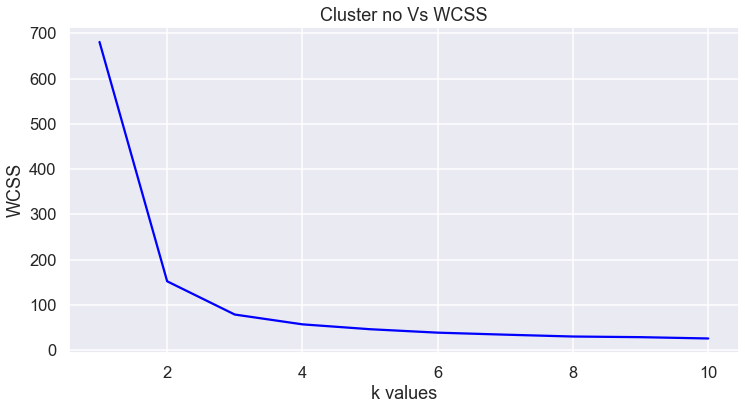

The wcss value at k=3 is:  78.94084142614601


In [142]:
plt.figure(figsize = (12,6))
plt.plot(k_values, wcss, color = 'blue')
plt.xlabel("k values")
plt.ylabel("WCSS")
plt.title("Cluster no Vs WCSS")
plt.show()

print("The wcss value at k=3 is: ", wcss[np.where(k_values==3)[0][0]])

* k value at 2 has an elbow point. Though the change in wcss is lesser after the k value at 3. Also, we can set the 'tol' parameter in kmeans in order for the algorithm to stop converging if the change in wcss becomes less than 'tol'(tolerance for wcss)
<br/>
<br/>
* As the k values increase, we can see that the wcss value minimizes. This only sounds good theoretically. at k = number of data points, the wcss would be 0. An ideal value, but beats the point of clustering. Hence the elbow method provides a pretty clean way of finding the optimal k value.

### Constructing the model

In [137]:
#Assign 3 as the no of clusters
model = KMeans(n_clusters = 3, init= 'k-means++', n_init = 10, max_iter=300, tol= 0.0001, random_state = 0)
clusters = model.fit_predict(x)

#The predicted centroids of the clusters
centroids = model.cluster_centers_ 

In [138]:
# Adding the predicted clusters to the dataframe
clusters = pd.Series(clusters, name = 'Predicted')
data = pd.concat([data,clusters], axis = 1)

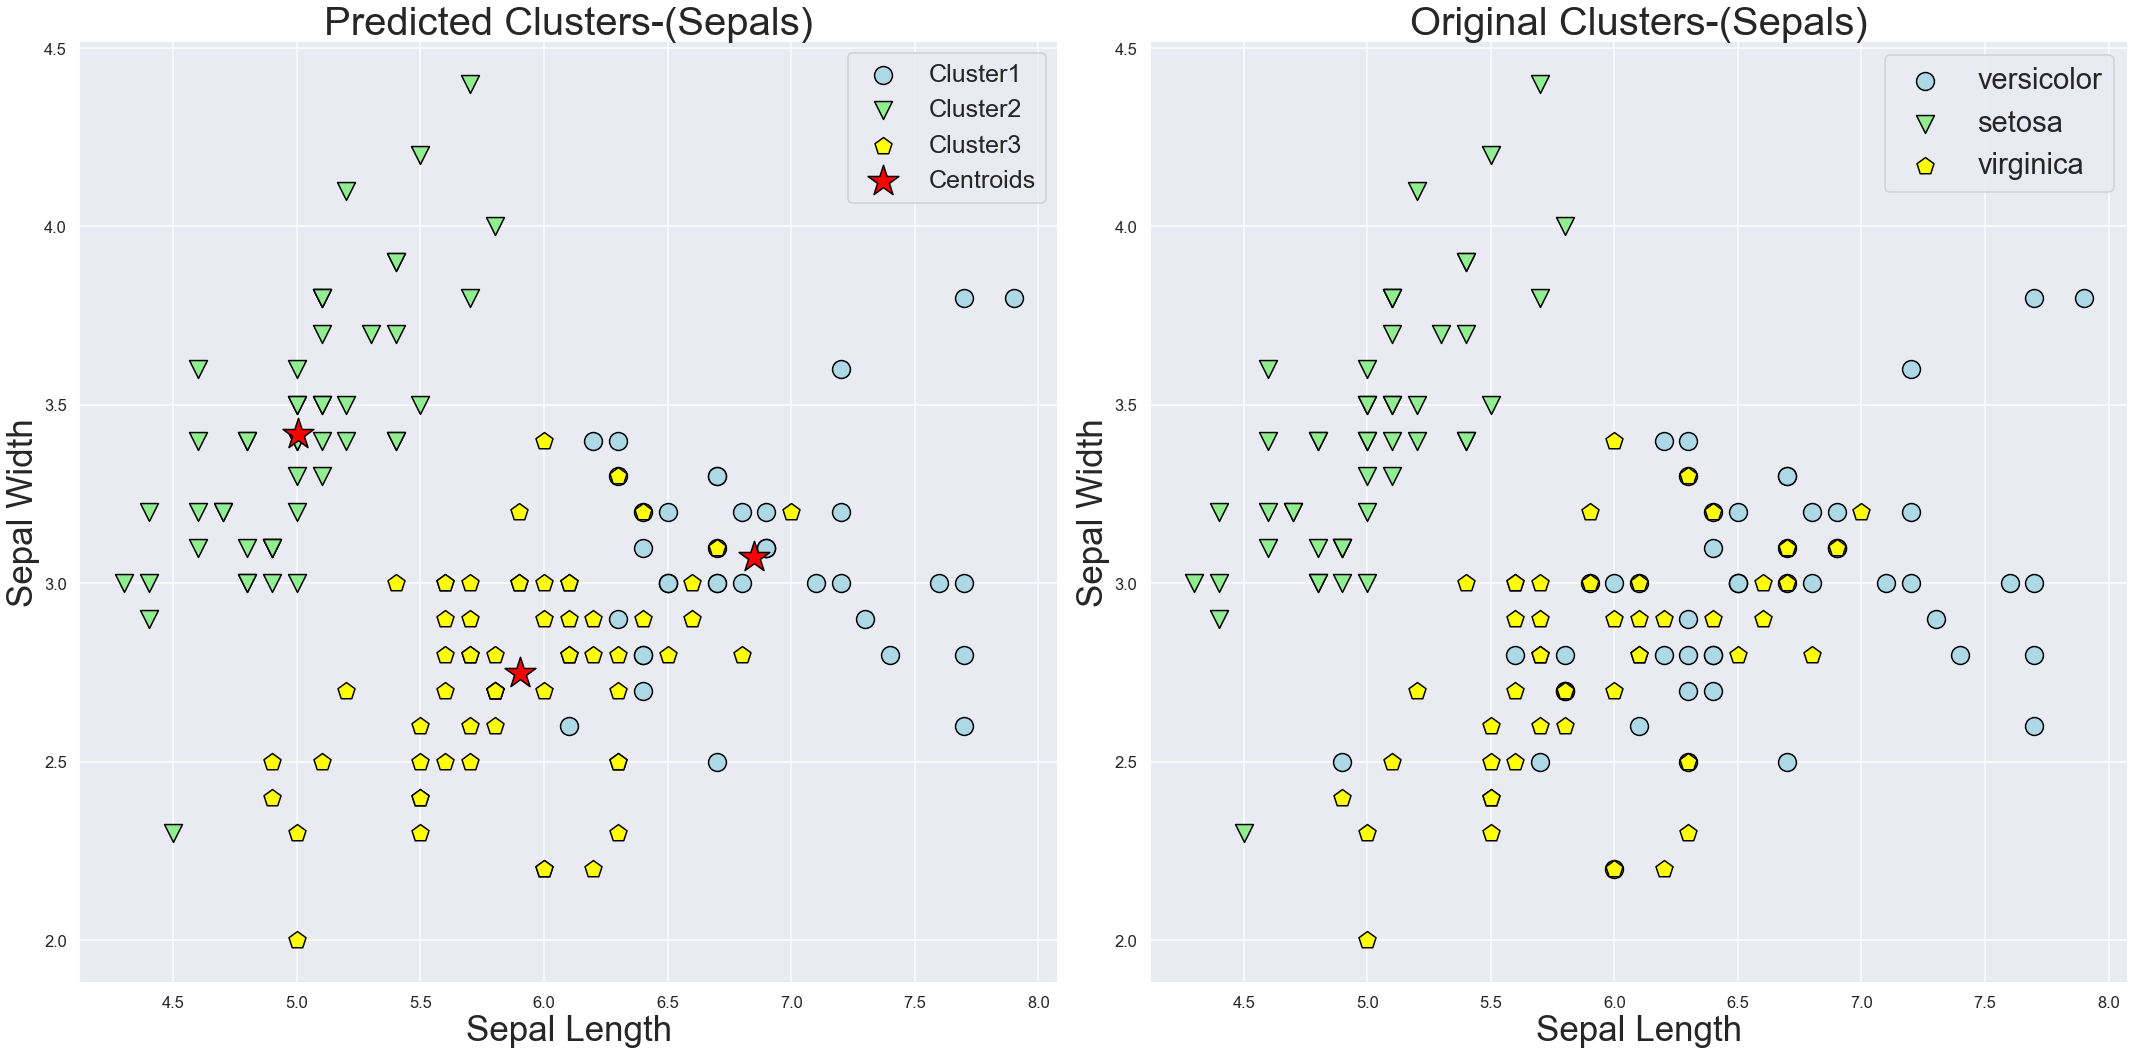

In [139]:
fig = plt.figure(figsize = (30,15))
ax1 = fig.add_subplot(121)
plt.scatter(x = data[data['Predicted']==0]['SepalLengthCm'], y = data[data['Predicted']==0]['SepalWidthCm'],s=320, 
            c='lightblue', marker = 'o',edgecolor = 'black' ,label = 'Cluster1')
plt.scatter(x = data[data['Predicted']==1]['SepalLengthCm'], y = data[data['Predicted']==1]['SepalWidthCm'], s=320,
            c='lightgreen',marker = 'v' ,edgecolor = 'black' ,label = 'Cluster2')
plt.scatter(x = data[data['Predicted']==2]['SepalLengthCm'], y = data[data['Predicted']==2]['SepalWidthCm'],s=320, 
            c='yellow', marker = 'p',edgecolor = 'black' ,label = 'Cluster3')
plt.scatter(x = centroids[:,0], y =centroids[:,1], c = 'red', marker = '*', edgecolor = 'black', s=1050,
            label = 'Centroids')
plt.xlabel("Sepal Length", fontsize = 35)
plt.ylabel("Sepal Width", fontsize = 35)
plt.legend(prop = {'size' : '25'})
plt.title("Predicted Clusters-(Sepals)", fontsize = 40)


ax2 = fig.add_subplot(122)
plt.scatter(x = data[data['Species']=='Iris-virginica']['SepalLengthCm'], y = data[data['Species']=='Iris-virginica']['SepalWidthCm'],s=320, 
            c='lightblue', marker = 'o',edgecolor = 'black' ,label = 'versicolor')
plt.scatter(x = data[data['Species']=='Iris-setosa']['SepalLengthCm'], y = data[data['Species']=='Iris-setosa']['SepalWidthCm'], s=320,
            c='lightgreen',marker = 'v' ,edgecolor = 'black' ,label = 'setosa')
plt.scatter(x = data[data['Species']=='Iris-versicolor']['SepalLengthCm'], y = data[data['Species']=='Iris-versicolor']['SepalWidthCm'],s=320, 
            c='yellow', marker = 'p',edgecolor = 'black' ,label = 'virginica')
plt.xlabel("Sepal Length", fontsize = 35)
plt.ylabel("Sepal Width", fontsize = 35)
plt.legend(prop = {'size' : '29'})
plt.title("Original Clusters-(Sepals)", fontsize = 40)
fig.tight_layout()

plt.show()


* This comparison would not be possible in a real-time unsupervised problem as there would be no labels in order to view the original clusters. It is done here as a show of evaluation.

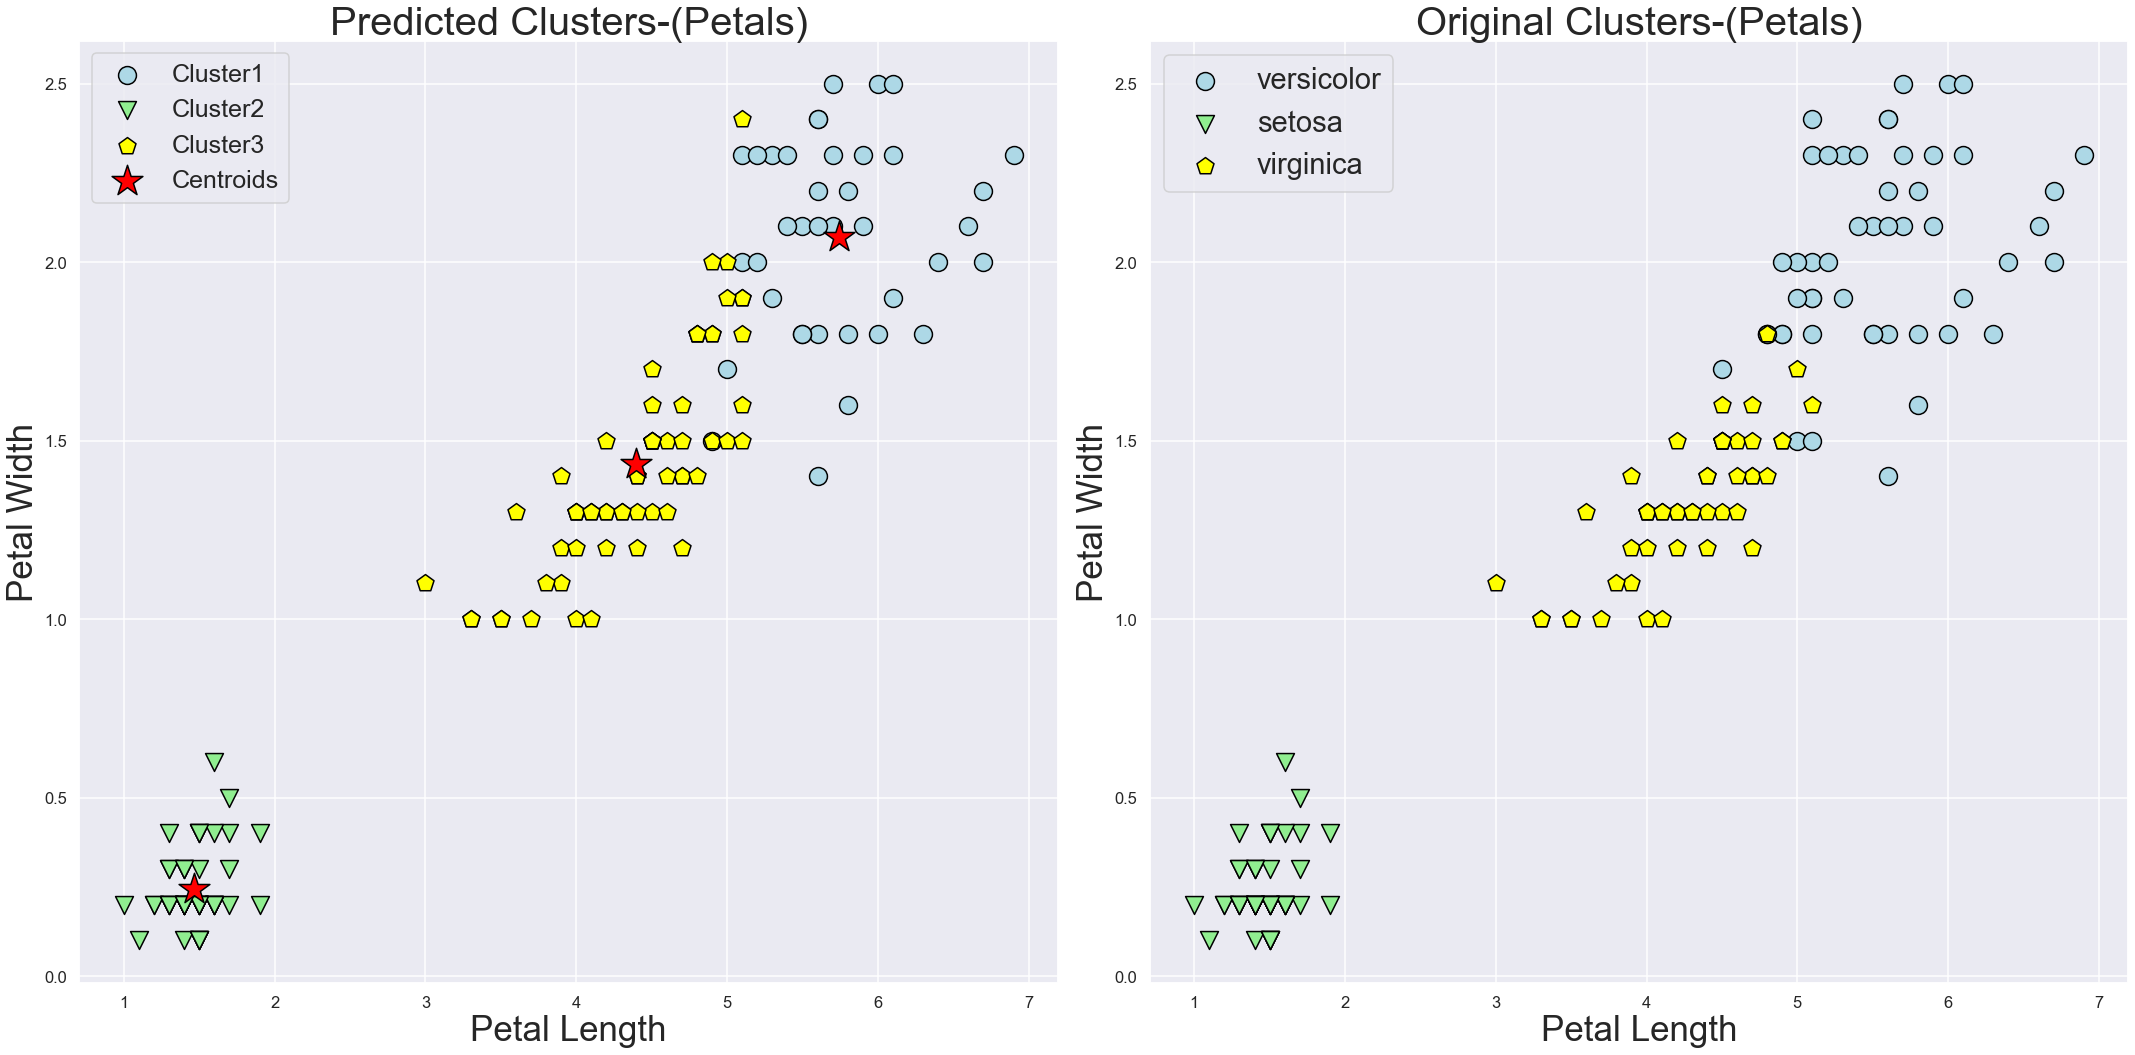

In [140]:
fig = plt.figure(figsize = (30,15))
ax1 = fig.add_subplot(121)
plt.scatter(x = data[data['Predicted']==0]['PetalLengthCm'], y = data[data['Predicted']==0]['PetalWidthCm'],s=320, 
            c='lightblue', marker = 'o',edgecolor = 'black' ,label = 'Cluster1')
plt.scatter(x = data[data['Predicted']==1]['PetalLengthCm'], y = data[data['Predicted']==1]['PetalWidthCm'], s=320,
            c='lightgreen',marker = 'v' ,edgecolor = 'black' ,label = 'Cluster2')
plt.scatter(x = data[data['Predicted']==2]['PetalLengthCm'], y = data[data['Predicted']==2]['PetalWidthCm'],s=320, 
            c='yellow', marker = 'p',edgecolor = 'black' ,label = 'Cluster3')
plt.scatter(x = centroids[:,2], y =centroids[:,3], c = 'red', marker = '*', edgecolor = 'black', s=1050,
            label = 'Centroids')
plt.xlabel("Petal Length", fontsize = 35)
plt.ylabel("Petal Width", fontsize = 35)
plt.legend(prop = {'size' : '25'})
plt.title("Predicted Clusters-(Petals)", fontsize = 40)


ax2 = fig.add_subplot(122)
plt.scatter(x = data[data['Species']=='Iris-virginica']['PetalLengthCm'], y = data[data['Species']=='Iris-virginica']['PetalWidthCm'],s=320, 
            c='lightblue', marker = 'o',edgecolor = 'black' ,label = 'versicolor')
plt.scatter(x = data[data['Species']=='Iris-setosa']['PetalLengthCm'], y = data[data['Species']=='Iris-setosa']['PetalWidthCm'], s=320,
            c='lightgreen',marker = 'v' ,edgecolor = 'black' ,label = 'setosa')
plt.scatter(x = data[data['Species']=='Iris-versicolor']['PetalLengthCm'], y = data[data['Species']=='Iris-versicolor']['PetalWidthCm'],s=320, 
            c='yellow', marker = 'p',edgecolor = 'black' ,label = 'virginica')
plt.xlabel("Petal Length", fontsize = 35)
plt.ylabel("Petal Width", fontsize = 35)
plt.legend(prop = {'size' : '29'})
plt.title("Original Clusters-(Petals)", fontsize = 40)
fig.tight_layout()

plt.show()

## Thank You